In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/mnist/")

Extracting /tmp/mnist/train-images-idx3-ubyte.gz
Extracting /tmp/mnist/train-labels-idx1-ubyte.gz
Extracting /tmp/mnist/t10k-images-idx3-ubyte.gz
Extracting /tmp/mnist/t10k-labels-idx1-ubyte.gz


In [5]:
# Model Parameters
learning_rate = 0.001
n_epochs = 20
batch_size = 100
display_step = 1

In [6]:
# Network Parameters
nd_input = 784
nd_hidden_l1 = 512
nd_hidden_l2 = 256
nd_output = 128

In [7]:
weights = {
    'encoder_w1': tf.Variable(tf.random_normal([nd_input, nd_hidden_l1])),
    'encoder_w2': tf.Variable(tf.random_normal([nd_hidden_l1, nd_hidden_l2])),
    'encoder_w3': tf.Variable(tf.random_normal([nd_hidden_l2, nd_output])),

    'decoder_w1': tf.Variable(tf.random_normal([nd_output, nd_hidden_l2])),
    'decoder_w2': tf.Variable(tf.random_normal([nd_hidden_l2, nd_hidden_l1])),
    'decoder_w3': tf.Variable(tf.random_normal([nd_hidden_l1, nd_input])),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([nd_hidden_l1])),
    'encoder_b2': tf.Variable(tf.random_normal([nd_hidden_l2])),
    'encoder_b3': tf.Variable(tf.random_normal([nd_output])),

    'decoder_b1': tf.Variable(tf.random_normal([nd_hidden_l2])),
    'decoder_b2': tf.Variable(tf.random_normal([nd_hidden_l1])),
    'decoder_b3': tf.Variable(tf.random_normal([nd_input])),

}

In [8]:
# tf Graph input
X = tf.placeholder("float", [None, nd_input])

In [9]:
# Encoder
def deep_encoder(x):
    # First layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_w1']), biases['encoder_b1']))
    
    # Second layer with sigmoid activation
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_w2']), biases['encoder_b2']))
    
    # Output layer with sigmoid activation
    out_layer = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_w3']), biases['encoder_b3']))
    
    return out_layer

# Decoder
def deep_decoder(x):
    
    # First layer with sigmoid activation
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_w1']), biases['decoder_b1']))
    
    # Second layer with sigmoid activation
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_w2']), biases['decoder_b2']))
    
    # Output layer with sigmoid activation
    out_layer = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_w3']), biases['decoder_b3']))
    
    return out_layer

In [10]:
# Build a  model
deepencoder_model = deep_encoder(X)
deepdecoder_model = deep_decoder(deepencoder_model)
# Encode input data
y_pred = deepdecoder_model

# True labels
Y = tf.placeholder("float")

# root Mean squared error
cost = tf.reduce_mean(tf.square(Y-y_pred))

# RMSprop optimizer to reduce cost function
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()

In [11]:
sess = tf.InteractiveSession()
sess.run(init)

n_batches = int(mnist.train.num_examples/batch_size)

# 20 epochs
for epoch in range(n_epochs):

    training_avg_loss = 0
    # Run all batches for each epoch
    for i in range(n_batches):
        xtr_batch, ytr_batch = mnist.train.next_batch(batch_size)

        # Run optimizer for each batch
        # c will hold the cost for each epoch
        _,c = sess.run([optimizer, cost], feed_dict={X: xtr_batch,Y: xtr_batch})
        
        training_avg_loss += c / n_batches



    # Display logs per each epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%2d' % (epoch+1), "cost=", "{:.5f}".format(training_avg_loss))

Epoch:  1 cost= 0.15824
Epoch:  2 cost= 0.12886
Epoch:  3 cost= 0.11789
Epoch:  4 cost= 0.11255
Epoch:  5 cost= 0.10618
Epoch:  6 cost= 0.10225
Epoch:  7 cost= 0.09847
Epoch:  8 cost= 0.09500
Epoch:  9 cost= 0.09195
Epoch: 10 cost= 0.09010
Epoch: 11 cost= 0.08874
Epoch: 12 cost= 0.08764
Epoch: 13 cost= 0.08648
Epoch: 14 cost= 0.08466
Epoch: 15 cost= 0.08313
Epoch: 16 cost= 0.08247
Epoch: 17 cost= 0.08196
Epoch: 18 cost= 0.08149
Epoch: 19 cost= 0.08101
Epoch: 20 cost= 0.07878


/home/achal/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


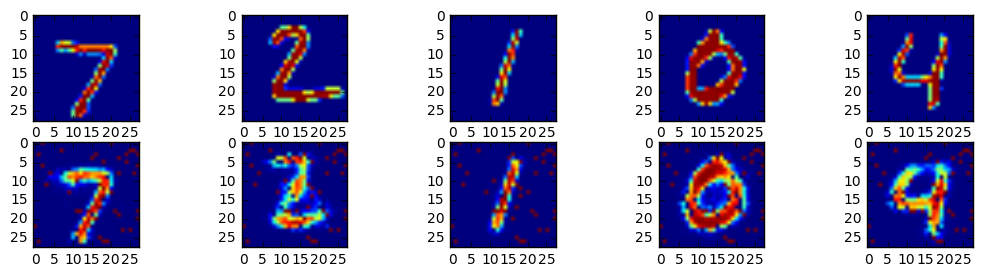

In [12]:
n_display_examples = 5

test = sess.run(y_pred, feed_dict={X: mnist.test.images[:n_display_examples]})

f, axisArr = plt.subplots(2, n_display_examples, figsize=(13, 3))

for i in range(n_display_examples):
    axisArr[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    axisArr[1][i].imshow(np.reshape(test[i], (28, 28)))
    
f.show()